In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pyforest
import seaborn as sns
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv("forestfires.csv")

In [24]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Exploratory Data Analysis (EDA)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [26]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [28]:
df.shape

(517, 31)

In [29]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [30]:
df[df.duplicated()].shape

(8, 31)

In [31]:
df=df.drop_duplicates()

In [32]:
df.shape

(509, 31)

In [33]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.136614,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.177044,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.106347,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.162761,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.329774,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,-0.047670,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,0.270919,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.009262,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,0.000706,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,-0.018868,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder=LabelEncoder()
df['size_category']=encoder.fit_transform(df['size_category'])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df=df.drop(df.columns[10:30],axis=1)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


In [37]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [38]:
df['month']=df['month'].replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(0,1,2,3,4,5,6,7,8,9,10,11))

In [39]:
df['day']=df['day'].replace(('sun','mon','tue','wed','thu','fri','sat'),(0,1,2,3,4,5,6))

In [40]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,7,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,7,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,7,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,7,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


# Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

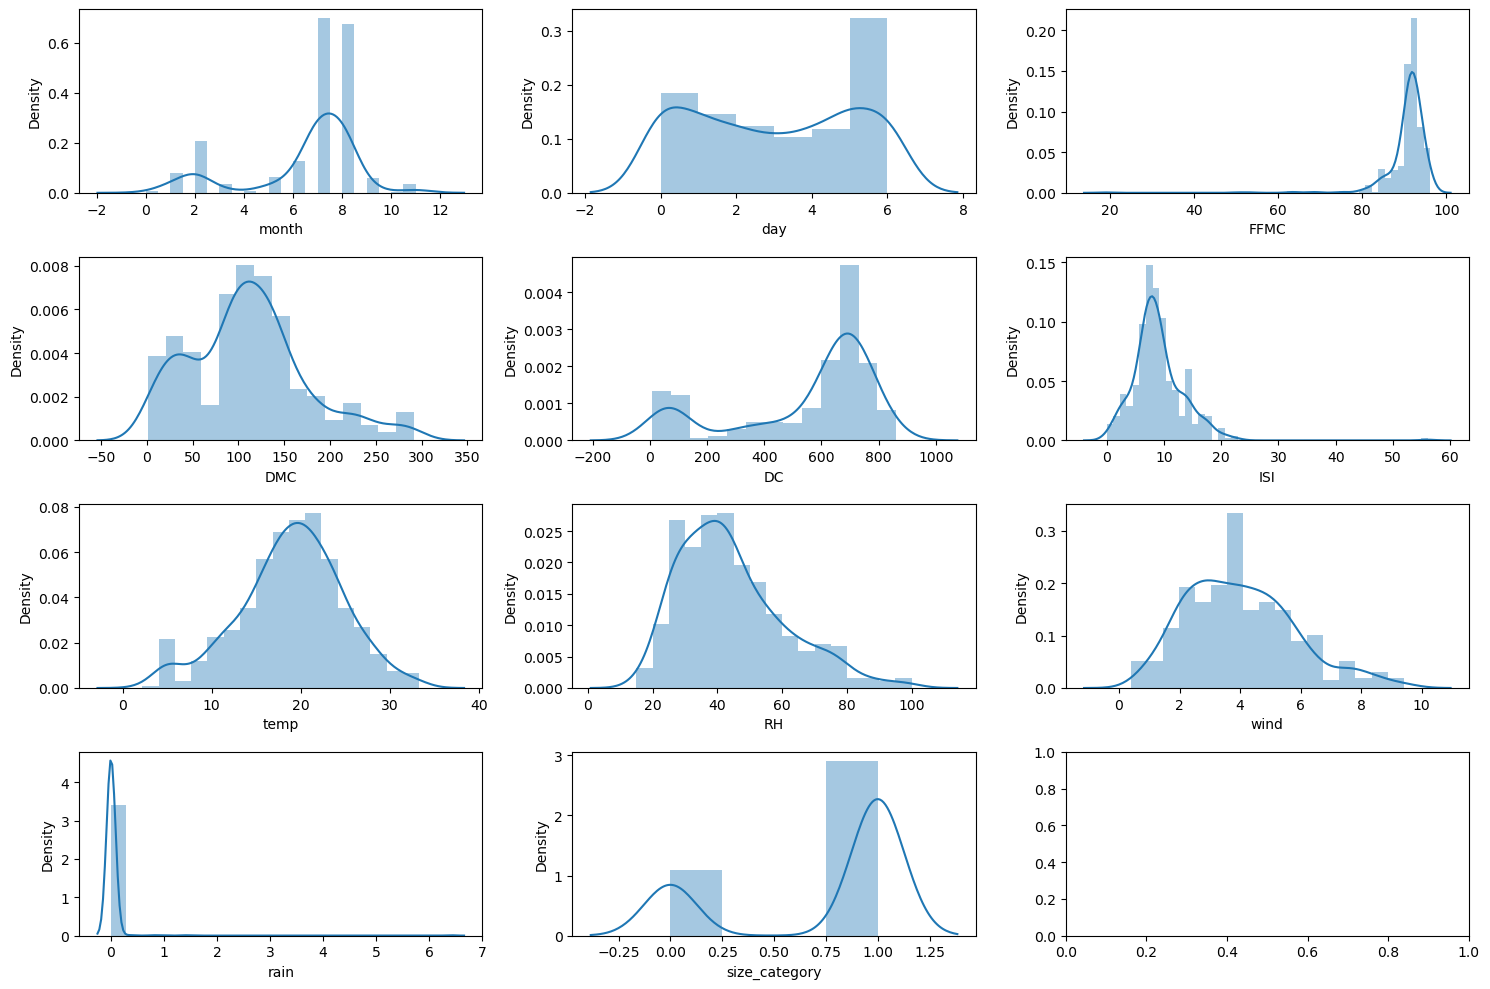

In [41]:
fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.distplot(df.month, ax=ax[0,0])
sns.distplot(df.day, ax=ax[0,1])
sns.distplot(df.FFMC, ax=ax[0,2])
sns.distplot(df.DMC, ax=ax[1,0])
sns.distplot(df.DC, ax=ax[1,1])
sns.distplot(df.ISI, ax=ax[1,2])
sns.distplot(df.temp, ax=ax[2,0])
sns.distplot(df.RH, ax=ax[2,1])
sns.distplot(df.wind, ax=ax[2,2])
sns.distplot(df.rain, ax=ax[3,0])
sns.distplot(df['size_category'], ax=ax[3,1])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

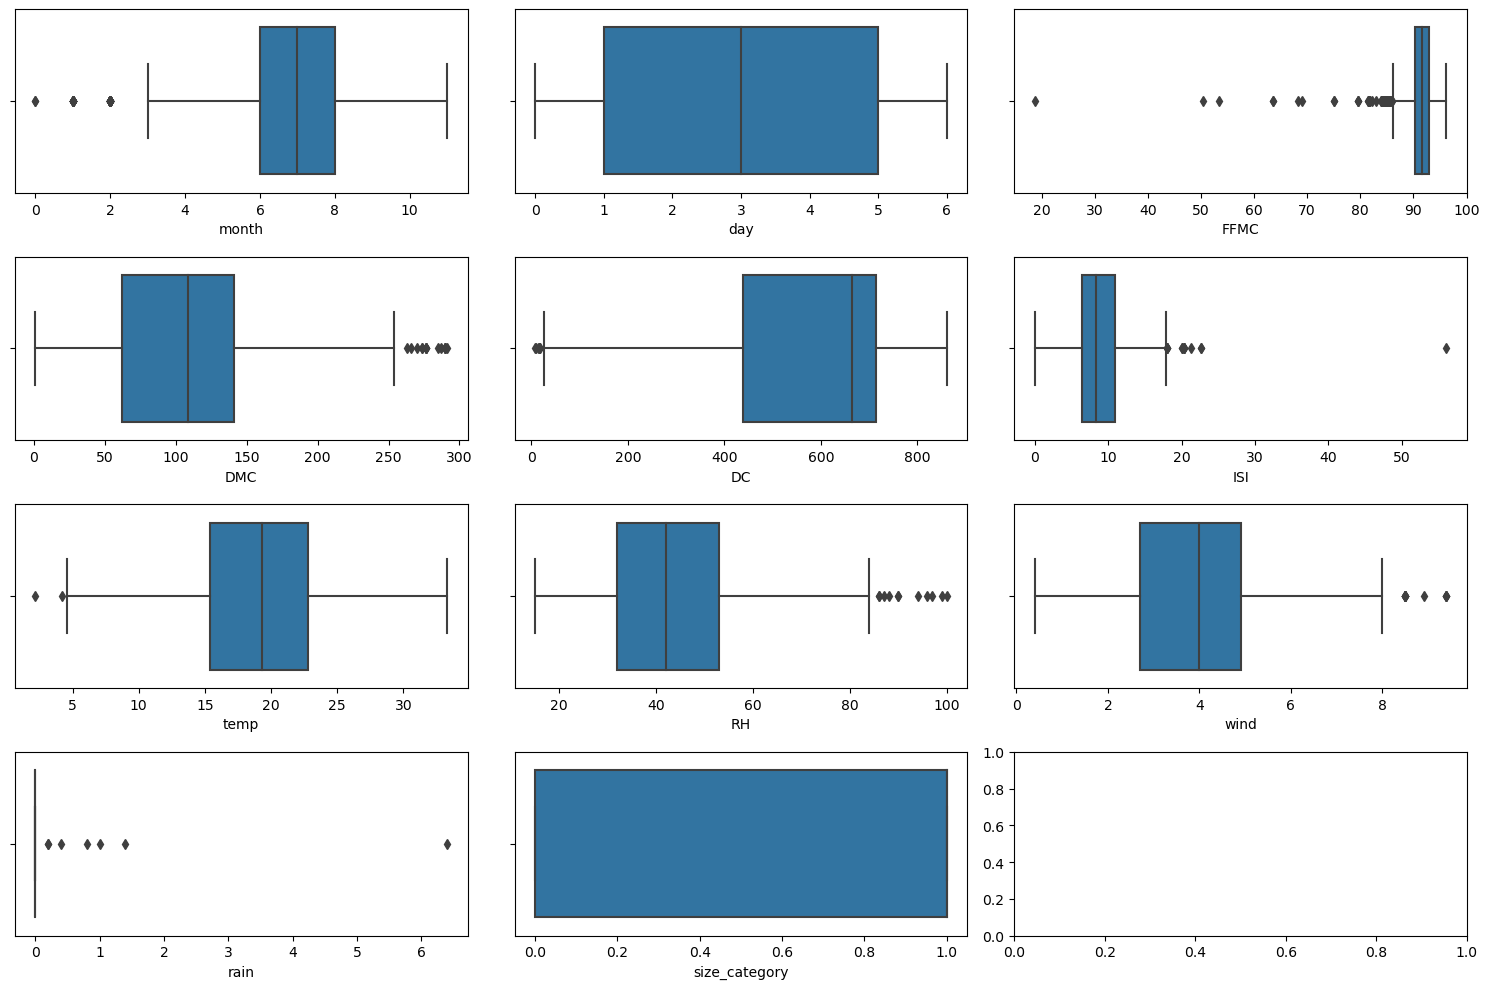

In [42]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(df.month, ax=ax[0,0])
sns.boxplot(df.day, ax=ax[0,1])
sns.boxplot(df.FFMC, ax=ax[0,2])
sns.boxplot(df.DMC, ax=ax[1,0])
sns.boxplot(df.DC, ax=ax[1,1])
sns.boxplot(df.ISI, ax=ax[1,2])
sns.boxplot(df.temp, ax=ax[2,0])
sns.boxplot(df.RH, ax=ax[2,1])
sns.boxplot(df.wind, ax=ax[2,2])
sns.boxplot(df.rain, ax=ax[3,0])
sns.boxplot(df['size_category'], ax=ax[3,1])
plt.tight_layout()
plt.show()

month


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

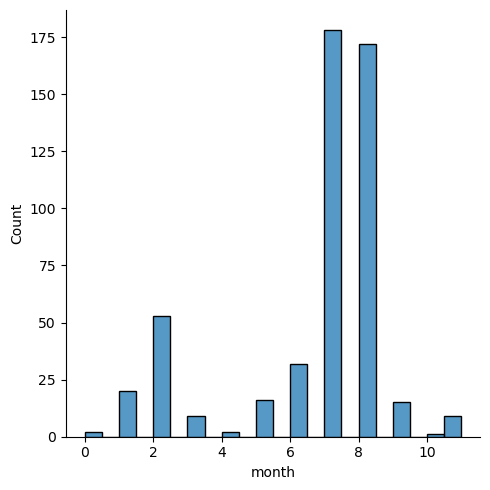

<Figure size 2000x1000 with 0 Axes>

day


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

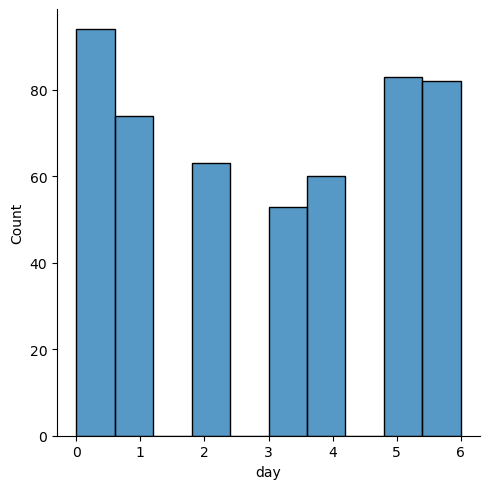

<Figure size 2000x1000 with 0 Axes>

FFMC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

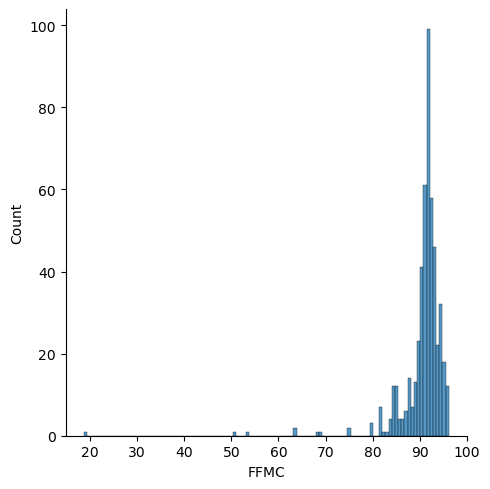

<Figure size 2000x1000 with 0 Axes>

DMC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

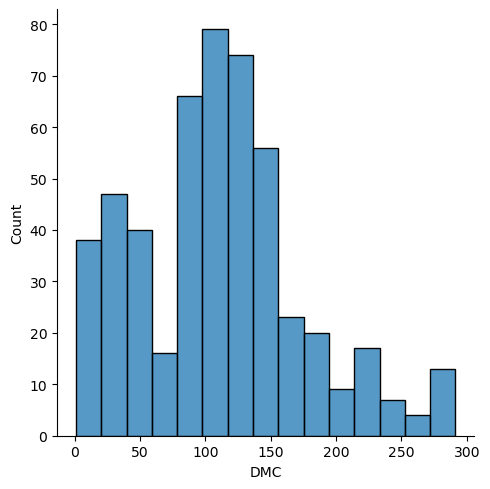

<Figure size 2000x1000 with 0 Axes>

DC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

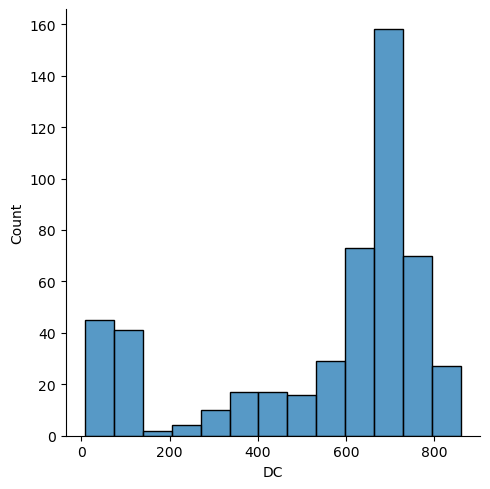

<Figure size 2000x1000 with 0 Axes>

ISI


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

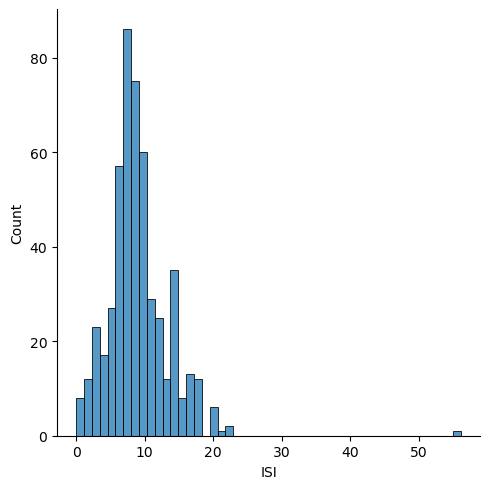

<Figure size 2000x1000 with 0 Axes>

temp


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

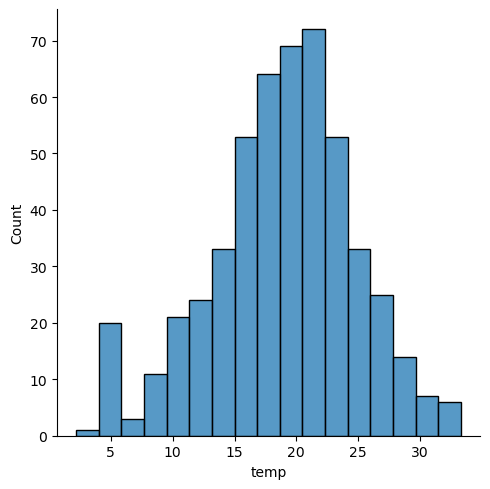

<Figure size 2000x1000 with 0 Axes>

RH


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

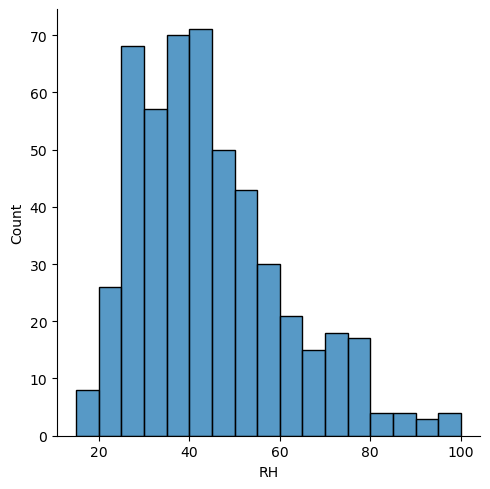

<Figure size 2000x1000 with 0 Axes>

wind


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

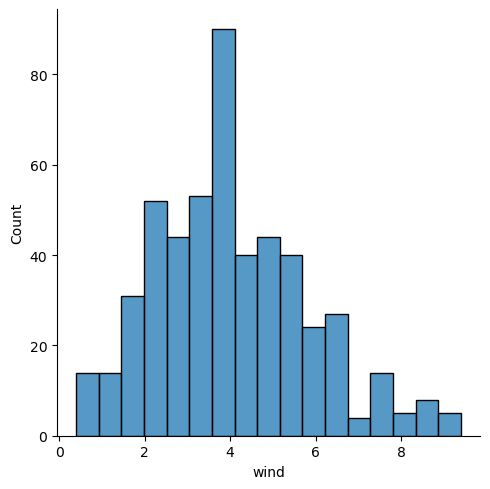

<Figure size 2000x1000 with 0 Axes>

rain


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

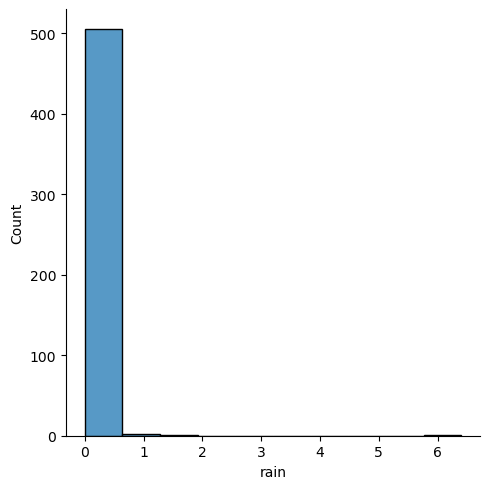

<Figure size 2000x1000 with 0 Axes>

size_category


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

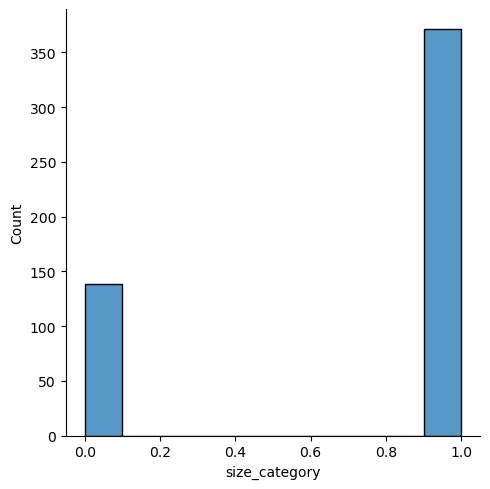

<Figure size 2000x1000 with 0 Axes>

In [43]:
for n in df.columns:
    print(n)
    sns.displot(df[n])
    plt.figure(figsize=(20,10))
    plt.show()

# Building our Model

In [45]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [46]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,7,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,7,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,7,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [47]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int32

In [48]:
model=Sequential()
model.add(Dense(12,input_dim=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='linear'))

In [49]:
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

In [50]:
#model.fit(X,Y,epochs=100,batch_size=10,validation_split=0.33)
history=model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 0.2349 - accuracy: 0.6305 - val_loss: 0.3890 - val_accuracy: 0.6607
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2019 - accuracy: 0.7566 - val_loss: 0.2882 - val_accuracy: 0.6607
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.7566 - val_loss: 0.3910 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.7713 - val_loss: 0.3265 - val_accuracy: 0.6667
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.7625 - val_loss: 0.3189 - val_accuracy: 0.6667
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.7625 - val_loss: 0.2627 - val_accuracy: 0.4107
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.7302 - val_loss: 0.4127 - val_accuracy: 0.6667
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1775 - accuracy: 0.7683 - val_loss: 0.2753 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.7771 - val_loss: 0.2541 - val_accuracy: 0.6667
Epoch 61/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.7771 - val_loss: 0.2622 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1758 - accuracy: 0.7683 - val_loss: 0.2383 - val_accuracy: 0.6667
Epoch 63/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1769 - accuracy: 0.7742 - val_loss: 0.2286 - val_accuracy: 0.6667
Epoch 64/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1779 - accuracy: 0.7771 - val_loss: 0.2421 - val_accuracy: 0.5833
Epoch 65/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1743 - accuracy: 0.7771 - val_loss: 0.2336 - val_accuracy: 0.6667
Epoch 

In [51]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]* scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.7446
accuracy: 55.44%


In [52]:
model.history.history.keys()

dict_keys([])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

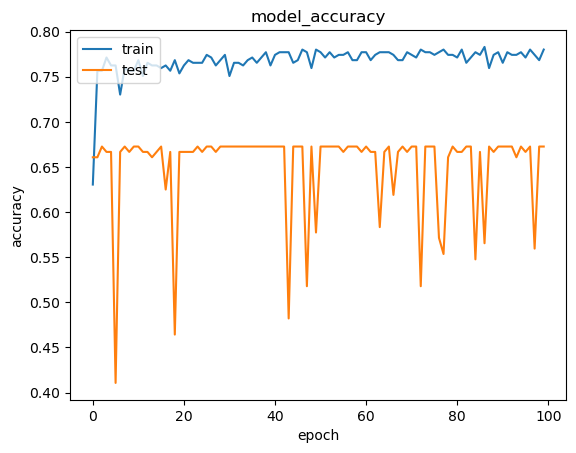

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

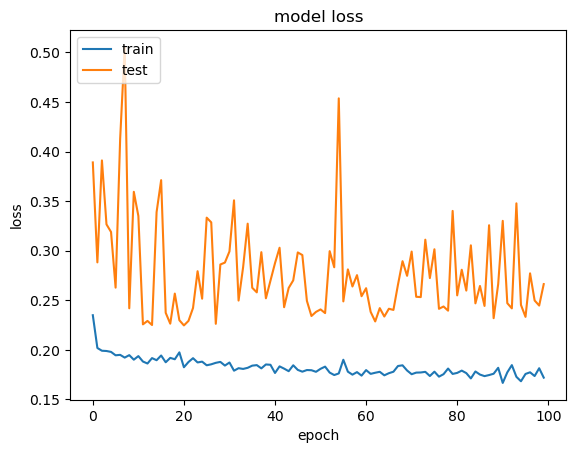

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()